# 누락데이터 확인 - 간접적인 방법 1) df.info( )

In [1]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [3]:
df.info() #deck 열의 누락 정보 : 0 ~ 890 => 총 891 개 - 203 = 688개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 누락데이터 확인 - 간접적인 방법 2) df[열 이름].value_counts(dropna=False)

In [4]:
nan_deck=df['deck'].value_counts(dropna=False)
print(nan_deck)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64


## 누락데이터 확인 - 직접적인 방법 : isnull 메소드 - 누락 데이터면 True, 유효한 데이터가 존재하면 False <-> notnull 메소드

In [5]:
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [6]:
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


## isnull 응용 : df.isnull().sum(axis=0)

In [7]:
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


# 누락 데이터 제거 : df.dropna(axis,thresh)

## df.dropna(axis=0) '해당 열의 누락 값이 너무 많아서 그냥 통째로 제거'

In [ ]:
# axis=1 : 수직 축 (열), axis=0 : 수평 축 (행)

In [8]:
# axis=1 이므로 '열' 을 기준으로 nan 값이 500 개 이상인 열을 제거 
df_thresh=df.dropna(axis=1,thresh=500)
print(df_thresh.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


## df.dropna(axis=1) '해당 subset 열에 누락 값들이 있는 행 제거'

In [9]:
# how = any : 누락값이 하나라도 있으면 제거 
df_age=df.dropna(subset=['age'],how='any',axis=0)
print(len(df_age))

714


# 누락 데이터 치환 df.fillna 메소드

In [10]:
mean_age=df['age'].mean(axis=0)
df['age'].fillna(mean_age,inplace=True)

In [11]:
most_freq=df['embark_town'].value_counts(dropna=True).idxmax()
print(most_freq)
df['embark_town'].fillna(most_freq,inplace=True)

Southampton


In [ ]:
# 누락 데이터가 Nan 값으로 표시되지 않는 경우 변환 : df.replace('?',np.nan,inplace=True)

## fillna(method=ffill, bfill) , ffill : nan 이 있는 행의 직전 행에 있는 값으로 바꿔줌 
<->bfill

In [12]:
df['embark_town'].fillna(method='ffill',inplace=True)

# 중복 데이터 처리 : duplicated 메소드

# 중복 데이터 제거 : drop_duplicates 메소드

# 자료형 변환 astype 메소드 

In [ ]:
# ex. df['horsepower']=df['horsepower'].astype('float')
# ex2. df['origin'].replace({1:'USA',2:'EU',3:'JPN'},inplace=True).astype('category')

# 범주형 데이터 구간 분할

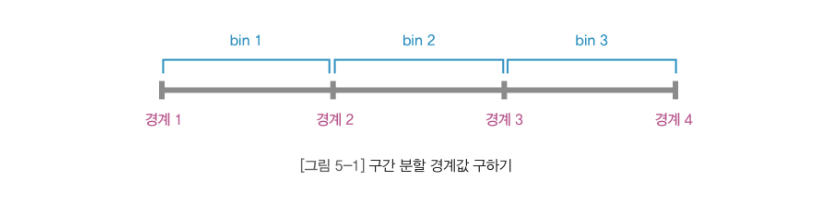

In [14]:
from IPython.display import Image
Image('/Users/baekjiyoon/Desktop/IMG_6B1743A8D616-1.jpeg')

### STEP 1. 경계값, 분할 구간 구하기 : np.histogram(data,bins)

In [ ]:
# count,bin_dividers=np.histogram(df['horsepower'],bins=3)

### STEP 2. pd.cut 함수로 각 데이터를 각 bin에 할당

In [ ]:
# bin_names = ['저','중','고']

# 매개변수 설명 : bins - 경계값 리스트, labels - bin 이름, include_lowest - 첫 경계값을 포함할지

# 시계열 데이터 다루기

## 판다스 시계열 데이터의 두가지 유형 : Timestamp, Period

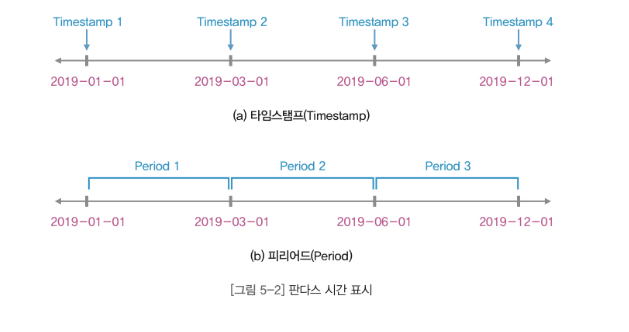

In [15]:
Image('/Users/baekjiyoon/Desktop/IMG_23ABDF298075-1.jpeg')

## 1) 문자열을 Timestamp 로 변환한 후 행 인덱스로 설정하면 시계열 순서에 맞는 인덱싱이 가능 : pd.to_datetime 메소드

## 2) Timestamp를 Period 로 변환 : to_period 메소드 'D' 일/'M' 월/'A' 일년

In [ ]:
# ex) ts_dates.to_period(freq='D')

## date_range, period_range 메소드 :  여러 개의 날짜가 들어있는 배열 형태의 시계열 데이터 생성 가능

## datetime 타입의 dt 속성 : 년,월,일 값 반환 -> dt.year,dt.month,dt.day